In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('train.csv')
df.head()

Saving train.csv to train.csv


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
#Explore and clean data
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Columns:\n", df.columns)
df.describe()

Shape: (15120, 56)
Missing values:
 Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
#Target variable and feature split
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [8]:
#Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8753306878306878

Confusion Matrix:
 [[329  59   0   0  13   0  20]
 [ 82 304  14   0  29   8   1]
 [  0   1 361  20   2  44   0]
 [  0   0   5 441   0   3   0]
 [  1   7  10   0 395   3   0]
 [  0   3  27  13   1 388   0]
 [ 10   1   0   0   0   0 429]]

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.78      0.78       421
           2       0.81      0.69      0.75       438
           3       0.87      0.84      0.85       428
           4       0.93      0.98      0.96       449
           5       0.90      0.95      0.92       416
           6       0.87      0.90      0.88       432
           7       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.88      0.87      3024



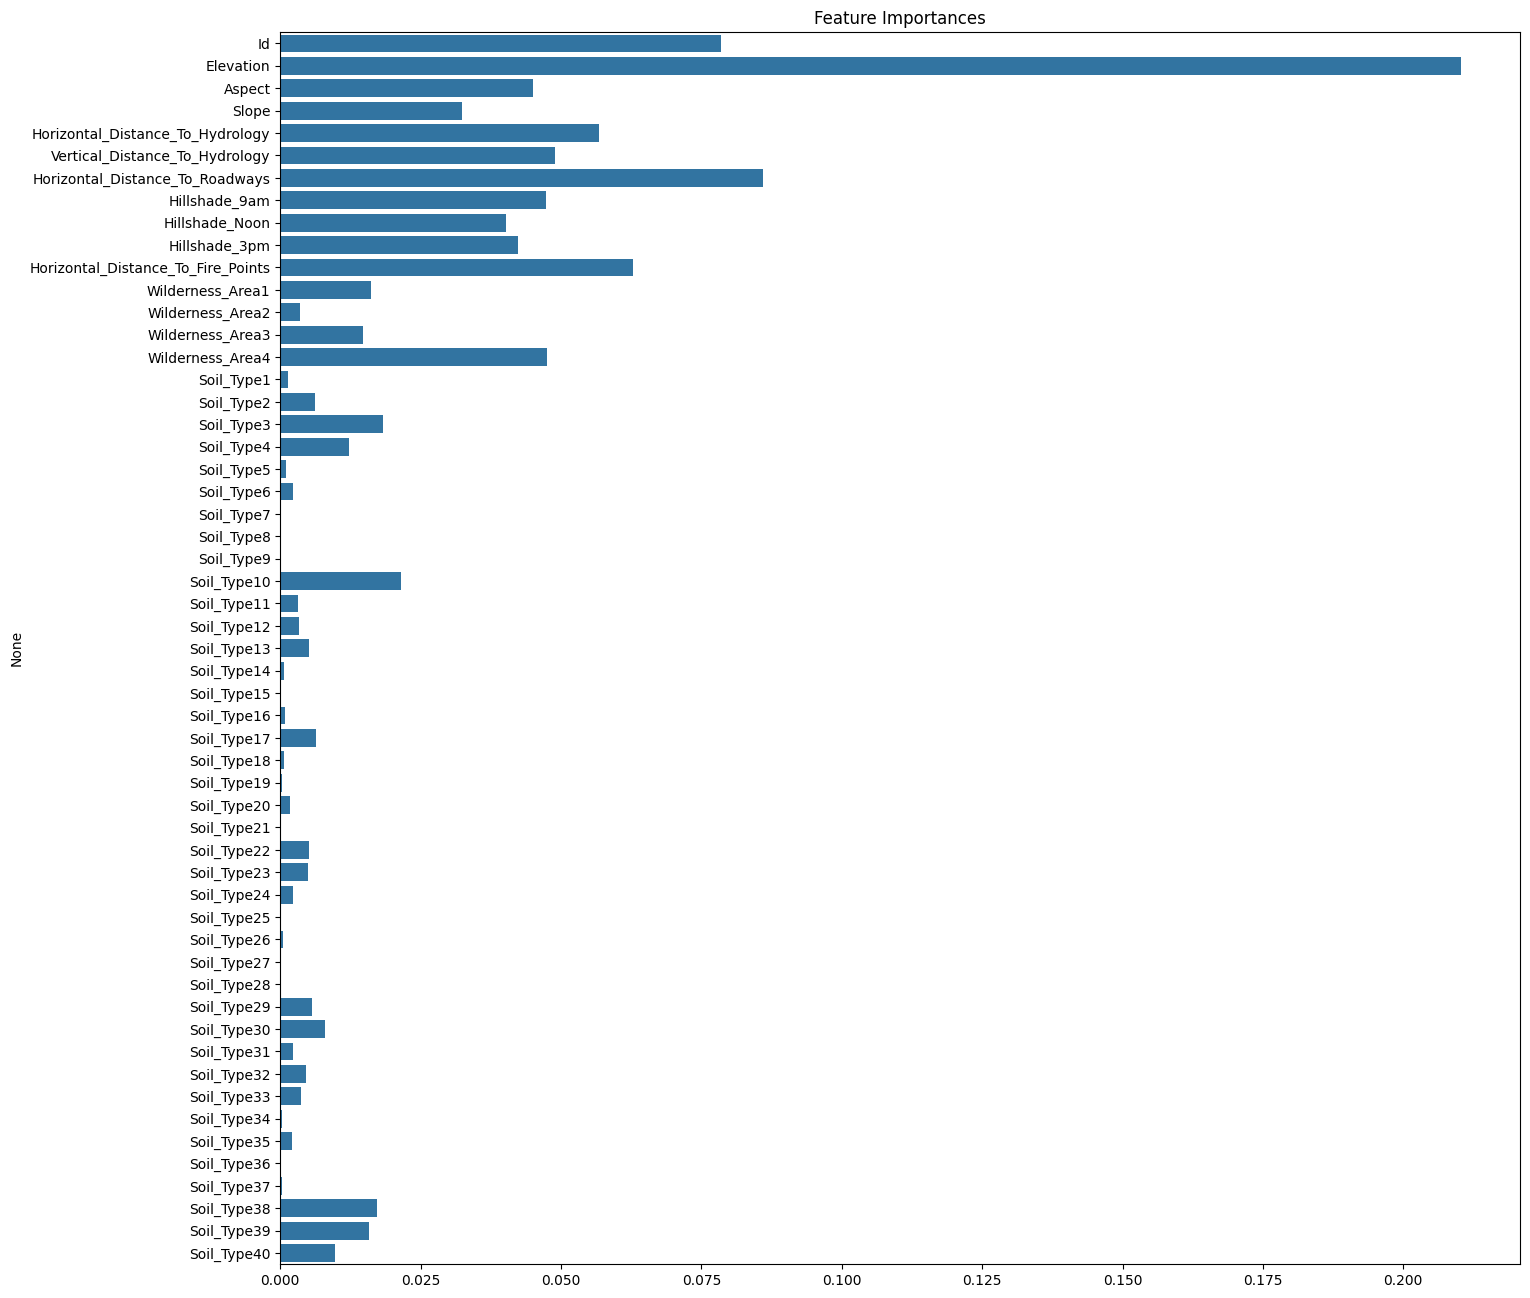

In [11]:
#Feature importance
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(16, 16))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

In [16]:
#XGBOOST
# Target class (Cover_Type) is 1-7 → Convert to 0-6 for XGBoost
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"] - 1  # Shift labels from 1-7 to 0-6
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
!pip install xgboost --quiet
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8743386243386243

Confusion Matrix:
 [[340  65   2   0   2   2  21]
 [ 74 294  15   0  33  12   4]
 [  0   2 369  13   8  40   0]
 [  0   0   8 420   0   4   0]
 [  1   5   8   0 413   5   0]
 [  0   2  35   3   5 387   0]
 [ 11   0   0   0   0   0 421]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       432
           1       0.80      0.68      0.73       432
           2       0.84      0.85      0.85       432
           3       0.96      0.97      0.97       432
           4       0.90      0.96      0.92       432
           5       0.86      0.90      0.88       432
           6       0.94      0.97      0.96       432

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [14]:
#LightGBM
!pip install lightgbm
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2414
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 45
[LightGBM] [Info] Start training from score -1.939565
[LightGBM] [Info] Start training from score -1.949388
[LightGBM] [Info] Start training from score -1.943598
[LightGBM] [Info] Start training from score -1.955797
[LightGBM] [Info] Start training from score -1.936693
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.950551
LightGBM Accuracy: 0.8819444444444444

Confusion Matrix:
 [[327  63   0   0  10   0  21]
 [ 82 307   8   0  32   5   4]
 [  0   0 374  11   5  38   0]
 [  0   0   5 439   0   5   0]
 [  2   6  10   0 396   2   0]
 [  0   5  24   7   3 393   0]
 [  9   0   0   0   0   0 431]]

Classification Report:
               precision    recal

In [20]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100],
    'max_depth': [16, 16],
    'learning_rate': [0.1], }
grid = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 100}
Best Score: 0.8611111111111112


In [21]:
#Cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy: ", scores)
print("Mean Accuracy: ", scores.mean())

Cross-validation Accuracy:  [0.31977513 0.50925926 0.53869048 0.5297619  0.67559524]
Mean Accuracy:  0.5146164021164021


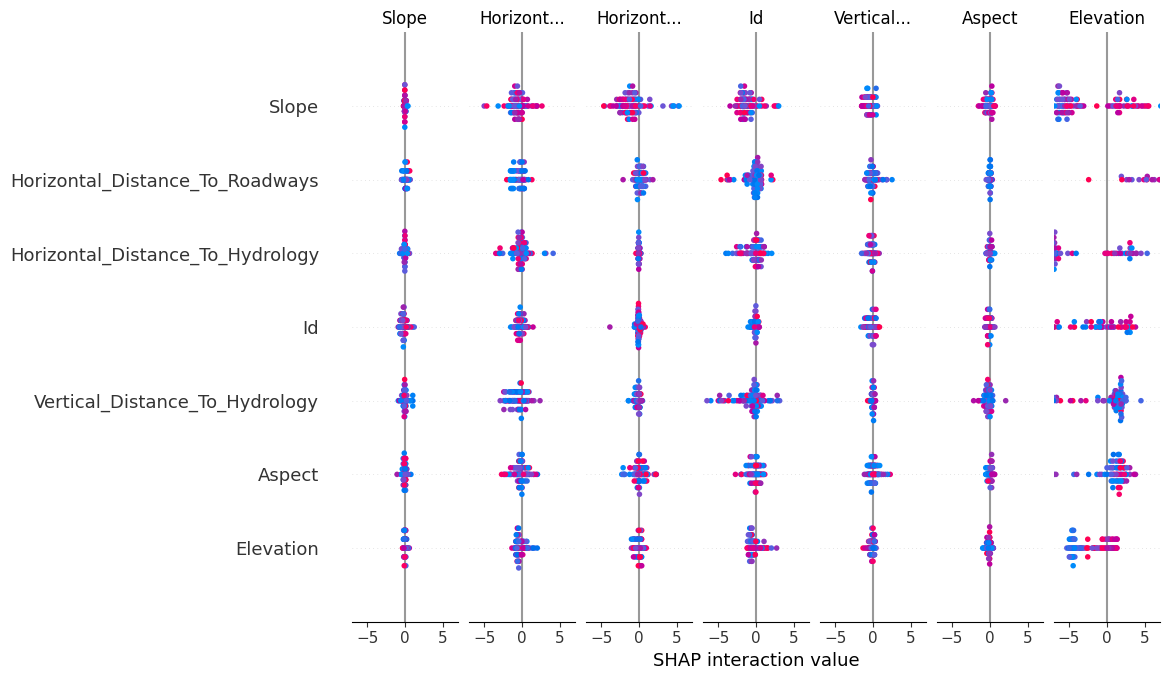

In [29]:
#Explainable Ai(SHAP)
!pip install shap
import shap
X_sample_df = X_test[:100]
X_sample = X_sample_df.values
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(
    shap_values, # Pass the list of shap_values directly
    X_sample_df, # Use X_sample_df for plotting
    feature_names=X_sample_df.columns,
    plot_type="violin"
)